In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50,DenseNet169,InceptionV3,MobileNet,EfficientNetB0
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')




2024-08-04 15:35:50.884384: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 15:35:50.884499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 15:35:51.011742: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
#generators
train_ds=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)

)

validation_ds=keras.preprocessing.image_dataset_from_directory(
    directory='/kaggle/input/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.


In [3]:
#normalize
def process(image,label):
    image=tf.cast(image/255. , tf.float32)
    return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

VGG16 - Feature Extraction

In [4]:
# Load the pre-trained VGG16 model, excluding top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Freeze the base model layers for feature extraction
base_model.trainable = False

In [6]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification


In [7]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ ?                      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [8]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)


Epoch 1/10


2024-08-04 15:39:14.697094: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65536: 3.31777, expected 2.61172
2024-08-04 15:39:14.697161: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65537: 5.10329, expected 4.39724
2024-08-04 15:39:14.697175: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65538: 4.80913, expected 4.10308
2024-08-04 15:39:14.697188: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65544: 5.33366, expected 4.62762
2024-08-04 15:39:14.697208: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65545: 5.00267, expected 4.29663
2024-08-04 15:39:14.697219: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65546: 4.93559, expected 4.22954
2024-08-04 15:39:14.697230: E external/local_xla/xla/service/gpu/buffer_comparator.cc:1137] Difference at 65547: 5.39283, expected 4.68678
2024-08-04 15:39:14.697240:

   2/3125 ━━━━━━━━━━━━━━━━━━━━ 4:33 87ms/step - accuracy: 0.5000 - loss: 4.9105   

I0000 00:00:1722785975.719887      74 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


3125/3125 ━━━━━━━━━━━━━━━━━━━━ 340s 101ms/step - accuracy: 0.7937 - loss: 0.5099 - val_accuracy: 0.8759 - val_loss: 0.2902
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 314s 100ms/step - accuracy: 0.8909 - loss: 0.2571 - val_accuracy: 0.8983 - val_loss: 0.2410
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 312s 100ms/step - accuracy: 0.9225 - loss: 0.1927 - val_accuracy: 0.9112 - val_loss: 0.2235
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 312s 100ms/step - accuracy: 0.9429 - loss: 0.1451 - val_accuracy: 0.9101 - val_loss: 0.2391
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 322s 100ms/step - accuracy: 0.9559 - loss: 0.1112 - val_accuracy: 0.9089 - val_loss: 0.2712
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 322s 100ms/step - accuracy: 0.9667 - loss: 0.0872 - val_accuracy: 0.9123 - val_loss: 0.2703
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 312s 100ms/step - accuracy: 0.9750 - loss: 0.0656 - val_accuracy: 0.9107 - val_loss: 0.3011
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 324s 100ms/step - accuracy: 0.9

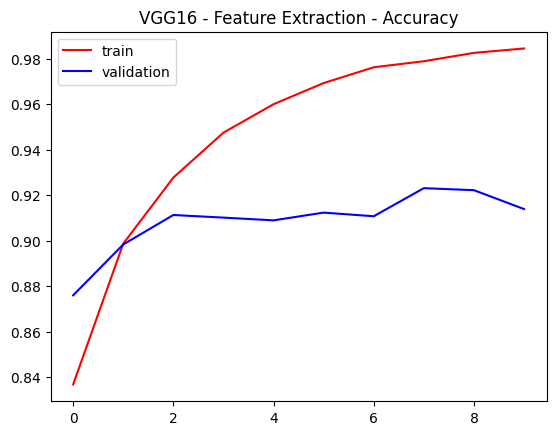

In [10]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("VGG16 - Feature Extraction - Accuracy")
plt.legend()
plt.show()

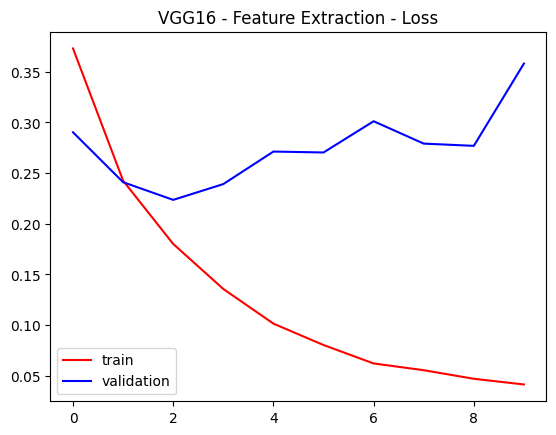

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("VGG16 - Feature Extraction - Loss")

plt.legend()
plt.show()

VGG16 - Fine Tuning

In [12]:
# Load VGG16 for fine-tuning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))


In [13]:
# Fine-tune some layers of the base model (optional tuning strategy)
for layer in base_model.layers[:15]:  # Freeze the first 15 layers
    layer.trainable = False

In [14]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [15]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [16]:
# Train the model 
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 353s 111ms/step - accuracy: 0.8190 - loss: 0.3828 - val_accuracy: 0.9263 - val_loss: 0.1843
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 378s 111ms/step - accuracy: 0.9512 - loss: 0.1256 - val_accuracy: 0.9549 - val_loss: 0.1166
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 347s 111ms/step - accuracy: 0.9803 - loss: 0.0566 - val_accuracy: 0.9610 - val_loss: 0.1066
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 382s 111ms/step - accuracy: 0.9916 - loss: 0.0273 - val_accuracy: 0.9628 - val_loss: 0.1096
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 347s 111ms/step - accuracy: 0.9939 - loss: 0.0187 - val_accuracy: 0.9660 - val_loss: 0.1074
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 347s 111ms/step - accuracy: 0.9959 - loss: 0.0134 - val_accuracy: 0.9542 - val_loss: 0.1673
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 381s 111ms/step - accuracy: 0.9960 - loss: 0.0118 - val_accuracy: 0.9689 - val_loss: 0.1159
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 381s 110ms/step - ac

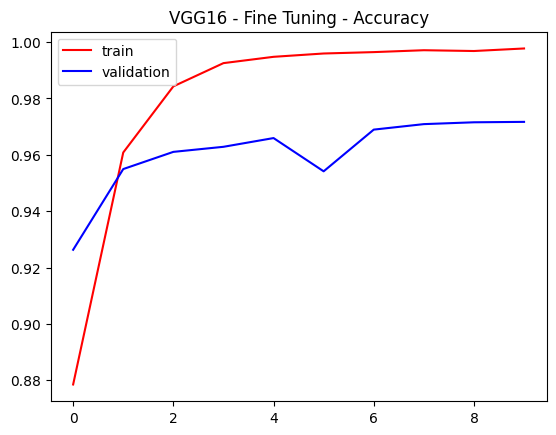

In [17]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("VGG16 - Fine Tuning - Accuracy")
plt.legend()
plt.show()

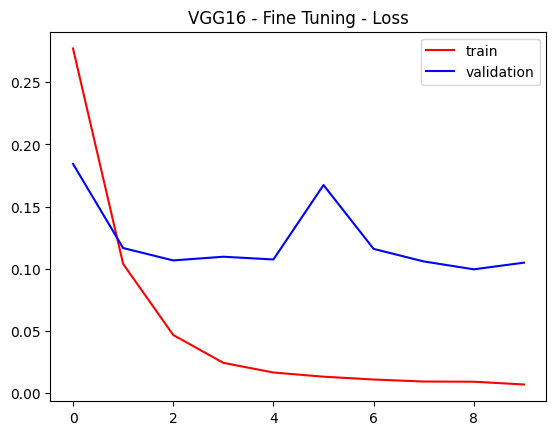

In [18]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("VGG16 - Fine Tuning - Loss")
plt.legend()
plt.show()

Resnet50 - Feature Extraction


In [19]:
# Load ResNet50 for feature extraction
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model layers


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [20]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [22]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)  


Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 249s 75ms/step - accuracy: 0.4968 - loss: 0.8919 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 74ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 231s 74ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 231s 74ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 231s 74ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 231s 74ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 264s 74ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 234s 75ms/step - accuracy: 

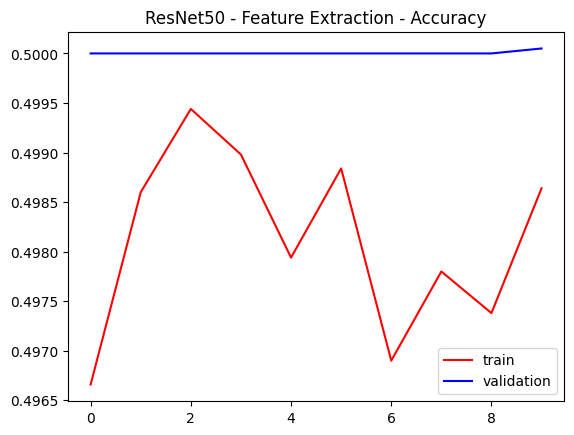

In [24]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("ResNet50 - Feature Extraction - Accuracy")
plt.legend()
plt.show()

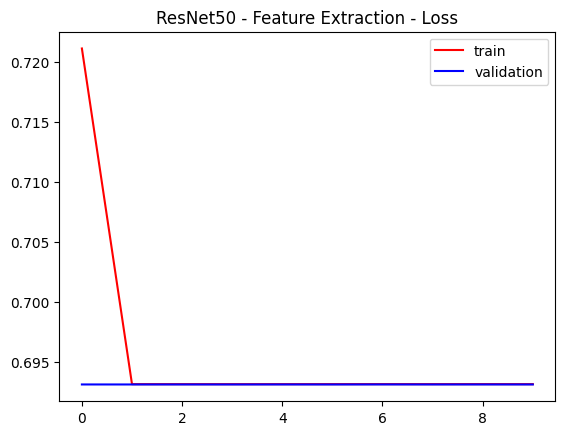

In [25]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("ResNet50 - Feature Extraction - Loss")

plt.legend()
plt.show()

ResNet50 - Fine Tuning

In [26]:
# Load ResNet50 for fine-tuning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Fine-tune a portion of the base model layers
for layer in base_model.layers[:-10]:  # Freeze the last 10 layers
    layer.trainable = False

In [27]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [28]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ ?                      │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 4,465,664 (17.04 MB)

 Non-trainable params: 19,122,048 (72.94 MB)

In [29]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [30]:
# Train the model (note the reduced number of epochs)
history= model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 269s 82ms/step - accuracy: 0.6721 - loss: 0.6047 - val_accuracy: 0.7492 - val_loss: 0.5043
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 81ms/step - accuracy: 0.7607 - loss: 0.4911 - val_accuracy: 0.7877 - val_loss: 0.4488
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.7961 - loss: 0.4353 - val_accuracy: 0.7690 - val_loss: 0.4876
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.8233 - loss: 0.3863 - val_accuracy: 0.7587 - val_loss: 0.5161
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.8482 - loss: 0.3430 - val_accuracy: 0.7741 - val_loss: 0.5000
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 251s 80ms/step - accuracy: 0.8672 - loss: 0.3058 - val_accuracy: 0.7964 - val_loss: 0.4634
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 253s 81ms/step - accuracy: 0.8873 - loss: 0.2693 - val_accuracy: 0.8411 - val_loss: 0.3832
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 252s 80ms/step - accuracy: 

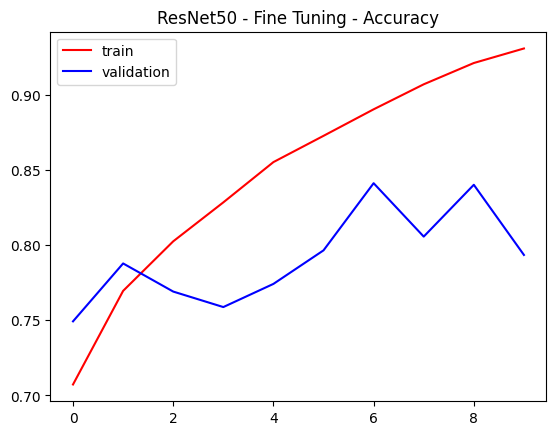

In [31]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("ResNet50 - Fine Tuning - Accuracy")
plt.legend()
plt.show()

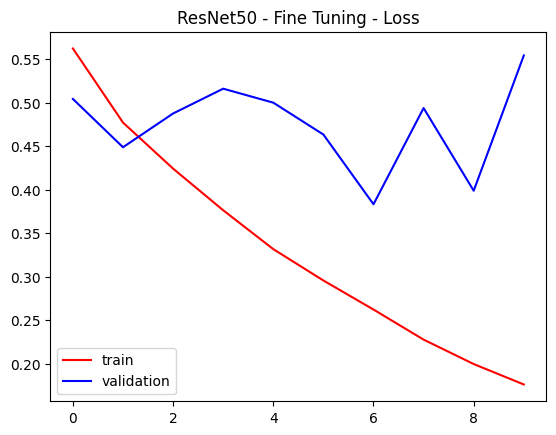

In [32]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("ResNet50 - Fine Tuning - Loss")
plt.legend()
plt.show()

DenseNet169 - Feature Extraction

In [33]:
# Load DenseNet169 for feature extraction
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model layers

51877672/51877672 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [34]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [36]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 364s 103ms/step - accuracy: 0.4996 - loss: 1.1880 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 345s 99ms/step - accuracy: 0.4996 - loss: 0.6981 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 309s 99ms/step - accuracy: 0.4992 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 308s 99ms/step - accuracy: 0.4971 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 307s 98ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 307s 98ms/step - accuracy: 0.4988 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 307s 98ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 303s 97ms/step - accuracy:

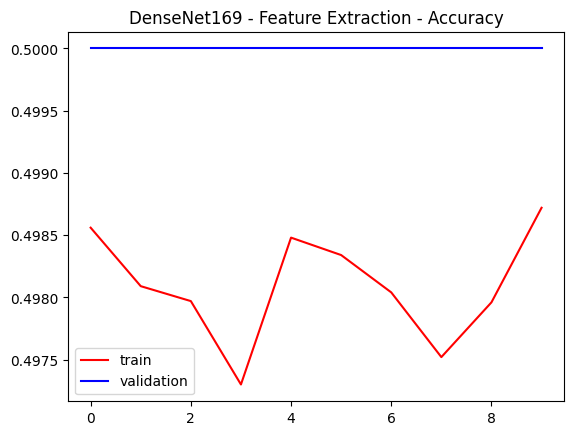

In [37]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("DenseNet169 - Feature Extraction - Accuracy")
plt.legend()
plt.show()

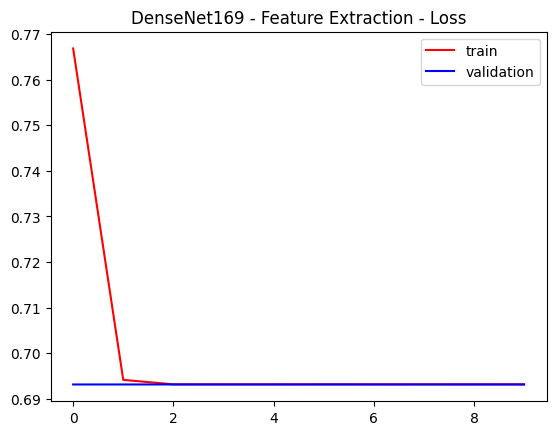

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("DenseNet169 - Feature Extraction - Loss")
plt.legend()
plt.show()

DensenNet169 - Fine Tuning

In [39]:
# Load DenseNet169 for fine-tuning
base_model = DenseNet169(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Fine-tune a portion of the base model layers
for layer in base_model.layers[:-10]:  # Freeze the last 10 layers 
    layer.trainable = False

In [40]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [41]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
# Train the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 352s 102ms/step - accuracy: 0.8425 - loss: 0.3449 - val_accuracy: 0.9345 - val_loss: 0.1636
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 307s 98ms/step - accuracy: 0.9475 - loss: 0.1320 - val_accuracy: 0.9510 - val_loss: 0.1288
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 308s 99ms/step - accuracy: 0.9720 - loss: 0.0759 - val_accuracy: 0.9608 - val_loss: 0.0998
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 308s 99ms/step - accuracy: 0.9851 - loss: 0.0445 - val_accuracy: 0.9610 - val_loss: 0.1026
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 321s 98ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9541 - val_loss: 0.1269
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 308s 99ms/step - accuracy: 0.9943 - loss: 0.0197 - val_accuracy: 0.9691 - val_loss: 0.0855
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 310s 99ms/step - accuracy: 0.9963 - loss: 0.0146 - val_accuracy: 0.9632 - val_loss: 0.1084
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 307s 98ms/step - accuracy:

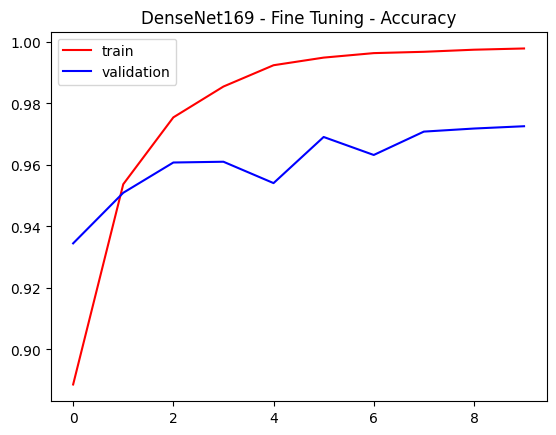

In [43]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("DenseNet169 - Fine Tuning - Accuracy")
plt.legend()
plt.show()

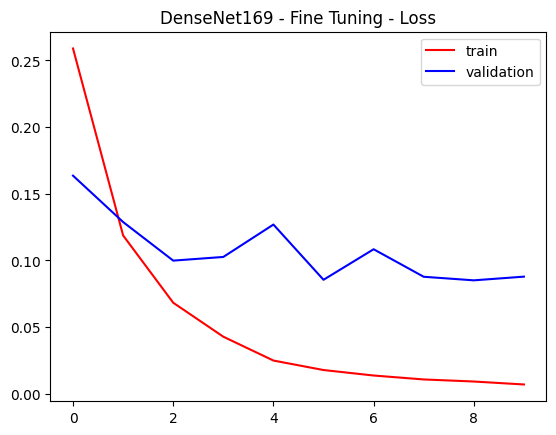

In [44]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("DenseNet169 - Fine Tuning - Loss")
plt.legend()
plt.show()

EfficientNetB0 - FeatureExtraction

In [45]:
# Load EfficientNetB4 for feature extraction
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model layers

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [46]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [47]:
# Compile the model (optional for feature extraction)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [48]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,049,571 (15.45 MB)

In [49]:
# Train the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 187s 50ms/step - accuracy: 0.5019 - loss: 0.8054 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.4989 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 150s 48ms/step - accuracy: 0.4976 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.4984 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 149s 48ms/step - accuracy: 

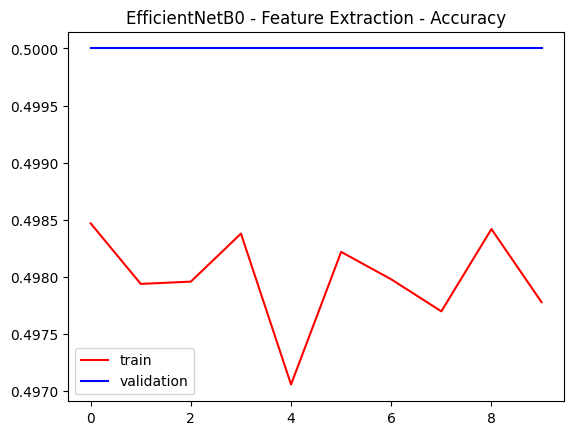

In [50]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("EfficientNetB0 - Feature Extraction - Accuracy")
plt.legend()
plt.show()

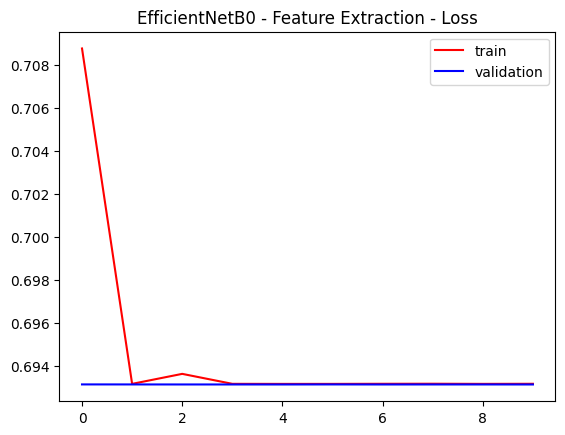

In [51]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("EfficientNetB0 - Feature Extraction - Loss")
plt.legend()
plt.show()

EfficientNetB0 - Fine Tuning

In [52]:
# Load EfficientNetB7 for fine-tuning
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Fine-tune a portion of the base model layers (adjust as needed)
for layer in base_model.layers[:-10]:  # Freeze the last 10 layers
    layer.trainable = False

In [53]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [54]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ ?                      │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 893,232 (3.41 MB)

 Non-trainable params: 3,156,339 (12.04 MB)

In [56]:
# Train the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds) 

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 197s 52ms/step - accuracy: 0.5000 - loss: 0.7415 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.5007 - loss: 0.7131 - val_accuracy: 0.5000 - val_loss: 0.7032
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.5006 - loss: 0.7143 - val_accuracy: 0.5000 - val_loss: 0.7018
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 160s 51ms/step - accuracy: 0.4981 - loss: 0.7089 - val_accuracy: 0.5000 - val_loss: 0.6929
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.4988 - loss: 0.7066 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.5023 - loss: 0.7078 - val_accuracy: 0.5000 - val_loss: 0.7277
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 159s 51ms/step - accuracy: 0.5013 - loss: 0.7038 - val_accuracy: 0.5000 - val_loss: 0.6960
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 202s 51ms/step - accuracy: 

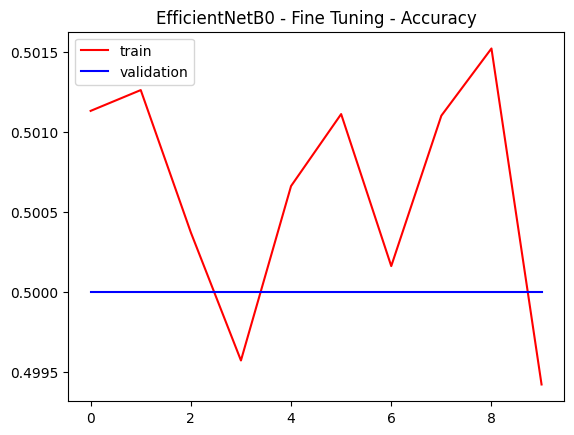

In [57]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("EfficientNetB0 - Fine Tuning - Accuracy")
plt.legend()
plt.show()

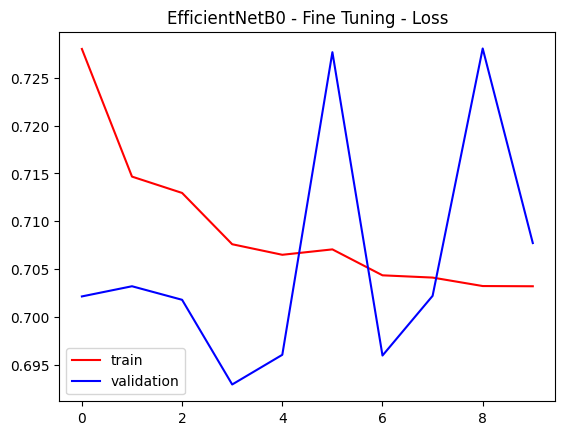

In [58]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("EfficientNetB0 - Fine Tuning - Loss")
plt.legend()
plt.show()

InceptionV3 - Feature Extraction

In [59]:

# Load InceptionV3 model for feature extraction
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False 

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [60]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [61]:
# Compile the model (optional for feature extraction)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [62]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 21,802,784 (83.17 MB)

In [63]:
# Train the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 240s 71ms/step - accuracy: 0.7817 - loss: 0.7048 - val_accuracy: 0.8627 - val_loss: 0.3201
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 69ms/step - accuracy: 0.8693 - loss: 0.3049 - val_accuracy: 0.8730 - val_loss: 0.2980
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 0.8970 - loss: 0.2493 - val_accuracy: 0.8794 - val_loss: 0.2875
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 0.9145 - loss: 0.2092 - val_accuracy: 0.8676 - val_loss: 0.3269
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.9294 - loss: 0.1724 - val_accuracy: 0.8745 - val_loss: 0.3198
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 0.9405 - loss: 0.1473 - val_accuracy: 0.8766 - val_loss: 0.3333
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 213s 68ms/step - accuracy: 0.9525 - loss: 0.1206 - val_accuracy: 0.8610 - val_loss: 0.4076
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 

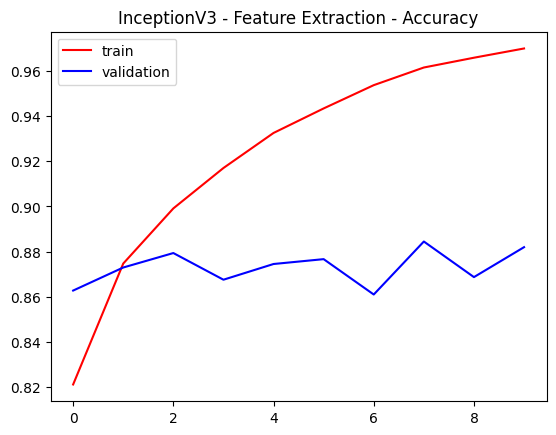

In [64]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("InceptionV3 - Feature Extraction - Accuracy")
plt.legend()
plt.show()

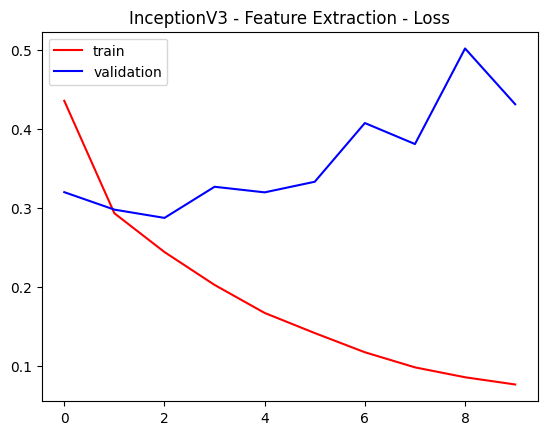

In [65]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("InceptionV3 - Feature Extraction - Loss")
plt.legend()
plt.show()

InceptionV3 - Fine Tuning


In [66]:
# Load InceptionV3 for fine-tuning
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze a portion of the base model layers (adjust as needed)
for layer in base_model.layers[:-10]:  # Freeze the last 10 layers
    layer.trainable = False

In [67]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [68]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [69]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ ?                      │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,802,784 (83.17 MB)

 Trainable params: 192 (768.00 B)

 Non-trainable params: 21,802,592 (83.17 MB)

In [70]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 232s 70ms/step - accuracy: 0.7825 - loss: 0.4539 - val_accuracy: 0.8653 - val_loss: 0.3109
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 0.8961 - loss: 0.2557 - val_accuracy: 0.8768 - val_loss: 0.2912
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 0.9297 - loss: 0.1886 - val_accuracy: 0.8918 - val_loss: 0.2559
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 68ms/step - accuracy: 0.9511 - loss: 0.1413 - val_accuracy: 0.9032 - val_loss: 0.2355
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 262s 68ms/step - accuracy: 0.9670 - loss: 0.1070 - val_accuracy: 0.9033 - val_loss: 0.2383
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 0.9796 - loss: 0.0784 - val_accuracy: 0.9065 - val_loss: 0.2327
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 214s 69ms/step - accuracy: 0.9863 - loss: 0.0606 - val_accuracy: 0.9117 - val_loss: 0.2235
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 215s 69ms/step - accuracy: 

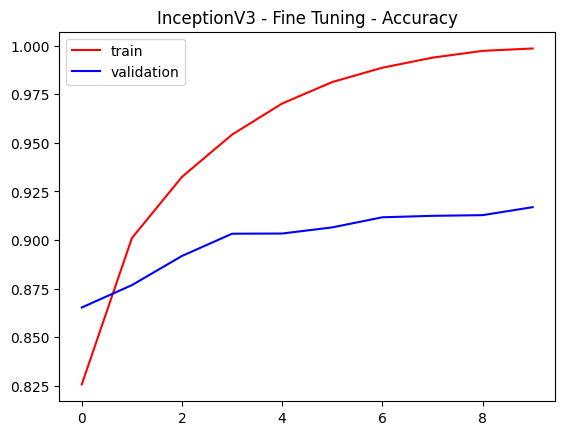

In [71]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("InceptionV3 - Fine Tuning - Accuracy")
plt.legend()
plt.show()

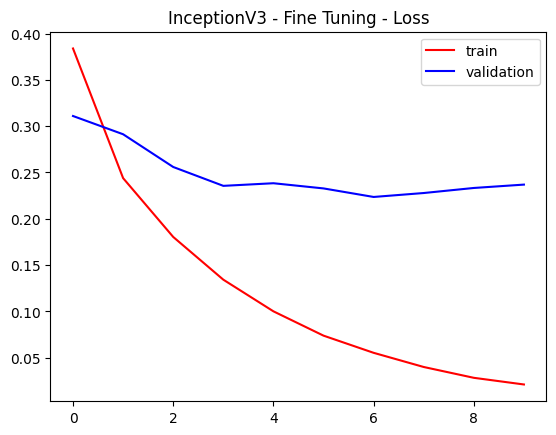

In [72]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("InceptionV3 - Fine Tuning - Loss")
plt.legend()
plt.show()

MobileNet - Feature Extraction

In [73]:
# Load MobileNet model for feature extraction
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False  # Freeze base model layers

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [74]:
# Build the sequential model
model = Sequential()
model.add(base_model)  # Add frozen base model as first layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid')) 

In [75]:
# Compile the model (optional for feature extraction)
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [76]:
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 3,228,864 (12.32 MB)

In [77]:
# Train the model
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 121s 36ms/step - accuracy: 0.8533 - loss: 0.6051 - val_accuracy: 0.9186 - val_loss: 0.2008
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 137s 36ms/step - accuracy: 0.9418 - loss: 0.1473 - val_accuracy: 0.9306 - val_loss: 0.1812
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 113s 36ms/step - accuracy: 0.9625 - loss: 0.0957 - val_accuracy: 0.9289 - val_loss: 0.2061
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 36ms/step - accuracy: 0.9744 - loss: 0.0647 - val_accuracy: 0.9322 - val_loss: 0.2234
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 0.9811 - loss: 0.0498 - val_accuracy: 0.9308 - val_loss: 0.2534
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step - accuracy: 0.9853 - loss: 0.0392 - val_accuracy: 0.9224 - val_loss: 0.3306
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 111s 35ms/step - accuracy: 0.9865 - loss: 0.0349 - val_accuracy: 0.9354 - val_loss: 0.2984
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 112s 36ms/step - accuracy: 

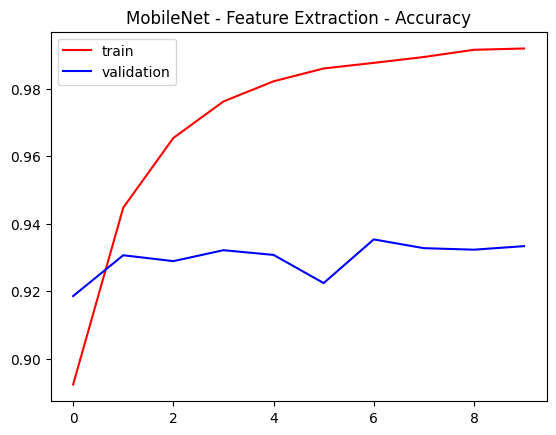

In [78]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("MobileNet - Feature Extraction - Accuracy")
plt.legend()
plt.show()

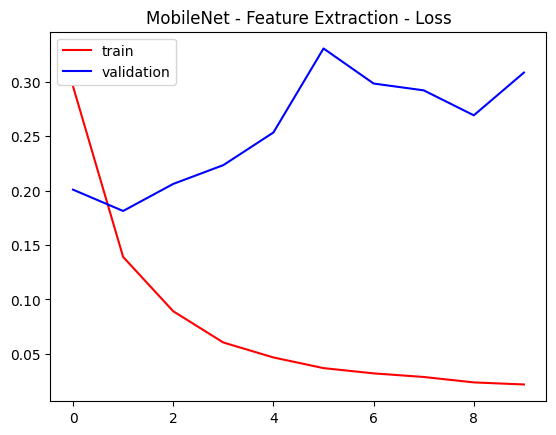

In [79]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("MobileNet - Feature Extraction - Loss")
plt.legend()
plt.show()

MobileNet - Fine Tuning

In [80]:
# Load MobileNet for fine-tuning
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze a portion of the base model layers (adjust as needed)
for layer in base_model.layers[:-10]:  # Freeze the last 10 layers
    layer.trainable = False

In [81]:
# Build the sequential model with fine-tuned layers
model = Sequential()
model.add(base_model)  # Add base model with fine-tuned layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification (adjust for your classes)


In [82]:
# Compile model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [83]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ ?                      │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,228,864 (12.32 MB)

 Trainable params: 1,588,224 (6.06 MB)

 Non-trainable params: 1,640,640 (6.26 MB)

In [84]:
history=model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 130s 39ms/step - accuracy: 0.8415 - loss: 0.3550 - val_accuracy: 0.9420 - val_loss: 0.1419
Epoch 2/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 122s 39ms/step - accuracy: 0.9727 - loss: 0.0773 - val_accuracy: 0.9574 - val_loss: 0.1149
Epoch 3/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 142s 39ms/step - accuracy: 0.9926 - loss: 0.0266 - val_accuracy: 0.9572 - val_loss: 0.1230
Epoch 4/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 122s 39ms/step - accuracy: 0.9959 - loss: 0.0151 - val_accuracy: 0.9624 - val_loss: 0.1200
Epoch 5/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 122s 39ms/step - accuracy: 0.9969 - loss: 0.0107 - val_accuracy: 0.9624 - val_loss: 0.1250
Epoch 6/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 123s 39ms/step - accuracy: 0.9981 - loss: 0.0069 - val_accuracy: 0.9629 - val_loss: 0.1347
Epoch 7/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 124s 40ms/step - accuracy: 0.9975 - loss: 0.0072 - val_accuracy: 0.9385 - val_loss: 0.2390
Epoch 8/10
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 123s 39ms/step - accuracy: 

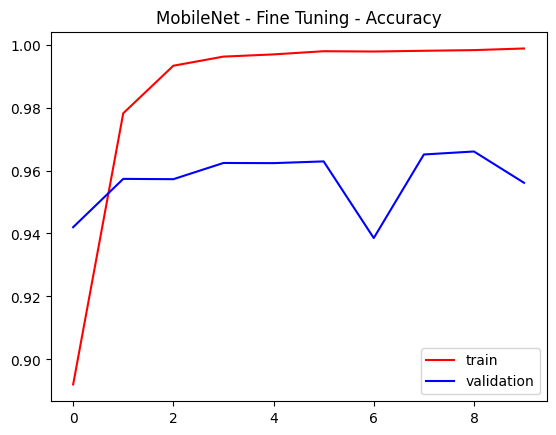

In [85]:

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.title("MobileNet - Fine Tuning - Accuracy")
plt.legend()
plt.show()

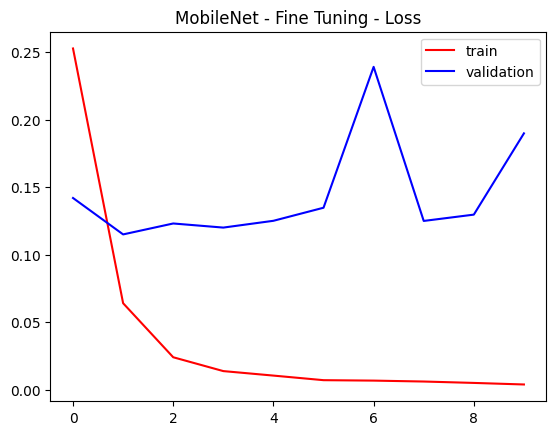

In [86]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.title("MobileNet - Fine Tuning - Loss")
plt.legend()
plt.show()